<a href="https://colab.research.google.com/github/manudsanun/python_dataviz2024/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_project_SC_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#นำเข้าข้อมูลที่ใช้
import pandas as pd
import os
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
titanic_df = pd.read_csv('/content/drive/MyDrive/data_viz_2024_DATA/titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. ข้อมูลประชากร (Demographics) โดยใช้เพื่อแสดงโครงสร้างอายุของผู้โดยสารใน Titanic พร้อมทั้งแบ่งเพศและแสดงกลุ่มอายุต่างๆ

In [ ]:
# prompt: สร้างตารางใหม่ที่มีแค่คอลัมน์เพศและอายุ จากนั้น drop na ออก

new_titanic_df = titanic_df[['Sex', 'Age','PassengerId']].copy()
new_titanic_df.dropna(inplace=True)


<ipython-input-8-adfbb9b54a2f>:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-8-adfbb9b54a2f>:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



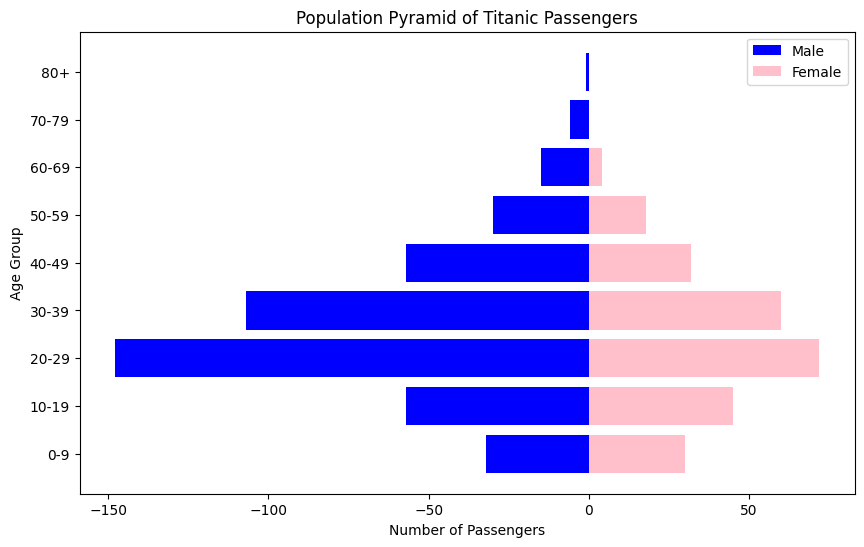

In [ ]:
# prompt: กราฟปิรามิด (Pyramid Chart) เหมาะสำหรับการแสดงข้อมูลประชากร (Demographics) โดยใช้เพื่อแสดงโครงสร้างอายุของผู้โดยสารใน Titanic พร้อมทั้งแบ่งเพศและแสดงกลุ่มอายุต่างๆ

import pandas as pd
import matplotlib.pyplot as plt

# สร้างกลุ่มอายุ
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']
new_titanic_df['AgeGroup'] = pd.cut(new_titanic_df['Age'], bins=bins, labels=labels, right=False)

# แยกข้อมูลตามเพศ
male_passengers = new_titanic_df[new_titanic_df['Sex'] == 'male']
female_passengers = new_titanic_df[new_titanic_df['Sex'] == 'female']

# นับจำนวนผู้โดยสารในแต่ละกลุ่มอายุและเพศ
male_age_counts = male_passengers.groupby('AgeGroup')['PassengerId'].count()
female_age_counts = female_passengers.groupby('AgeGroup')['PassengerId'].count()

# สร้างกราฟปิรามิด
fig, ax = plt.subplots(figsize=(10, 6))

ax.barh(labels, -male_age_counts, height=0.8, label='Male', color='blue')
ax.barh(labels, female_age_counts, height=0.8, label='Female', color='pink')

ax.set_xlabel('Number of Passengers')
ax.set_ylabel('Age Group')
ax.set_title('Population Pyramid of Titanic Passengers')
ax.legend()

plt.show()


# 2. สร้างกราฟ sunburst plot แสดงความสัมพันธ์ระหว่างเมืองต้นทางของผู้โดยสาร (Embarked) กับเพศหรือชนชั้น

In [ ]:
# prompt: สร้างกราฟ sunburst plot แสดงความสัมพันธ์ระหว่างเมืองต้นทางของผู้โดยสาร (Embarked) กับเพศหรือชนชั้น

import plotly.express as px

# Remove rows with missing values in 'Embarked' column
titanic_df = titanic_df.dropna(subset=['Embarked'])

# สร้าง Sunburst plot
fig = px.sunburst(titanic_df, path=['Embarked', 'Sex','Pclass'])
fig.show()

In [ ]:
# prompt: ลอง normalize จำนวนผู้โดยสารแล้วสร้ากราฟ sunburst plot อีกรอบ

# Normalize the counts of passengers by the total number of passengers
titanic_df['PassengerCount'] = 1
normalized_df = titanic_df.groupby(['Embarked', 'Sex', 'Pclass'])['PassengerCount'].sum().reset_index()
total_passengers = normalized_df['PassengerCount'].sum()
normalized_df['NormalizedCount'] = normalized_df['PassengerCount'] / total_passengers


# Create Sunburst plot with normalized counts
fig = px.sunburst(normalized_df, path=['Embarked', 'Sex', 'Pclass'], values='NormalizedCount')
fig.show()


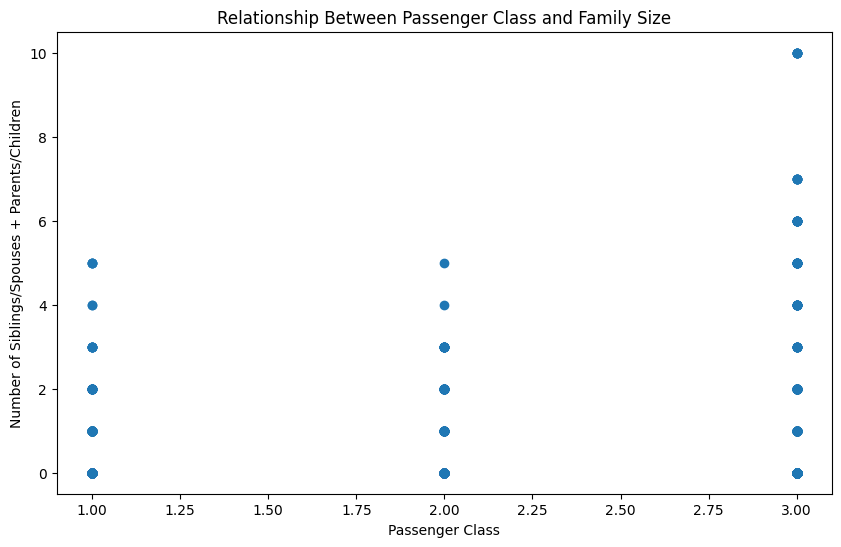

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [ ]:
# prompt: สร้างกราฟหาความสัมพันธ์ระหว่างชนชั้นของผู้โดยสารและจำนวนพี่น้องพ่อแม่ลูก เพื่อหาว่าชนชั้นใดมักจะนำครอบครัวขึ้นเรือมาด้วย

import matplotlib.pyplot as plt
# สร้างกราฟแสดงความสัมพันธ์ระหว่างชนชั้นและจำนวนพี่น้อง/พ่อแม่/ลูก
plt.figure(figsize=(10, 6))
plt.scatter(titanic_df['Pclass'], titanic_df['SibSp'] + titanic_df['Parch'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Siblings/Spouses + Parents/Children')
plt.title('Relationship Between Passenger Class and Family Size')
plt.show()

# สร้างกราฟแสดงจำนวนพี่น้อง/พ่อแม่/ลูกเฉลี่ยต่อชนชั้น
average_family_size_by_class = titanic_df.groupby('Pclass')['SibSp', 'Parch'].sum().sum(axis=1)
plt.figure(figsize=(10, 6))
plt.bar(average_family_size_by_class.index, average_family_size_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Average Family Size')
plt.title('Average Family Size per Passenger Class')
plt.show()



In [ ]:
import matplotlib.pyplot as plt
# สร้างกราฟแสดงความสัมพันธ์ระหว่างชน

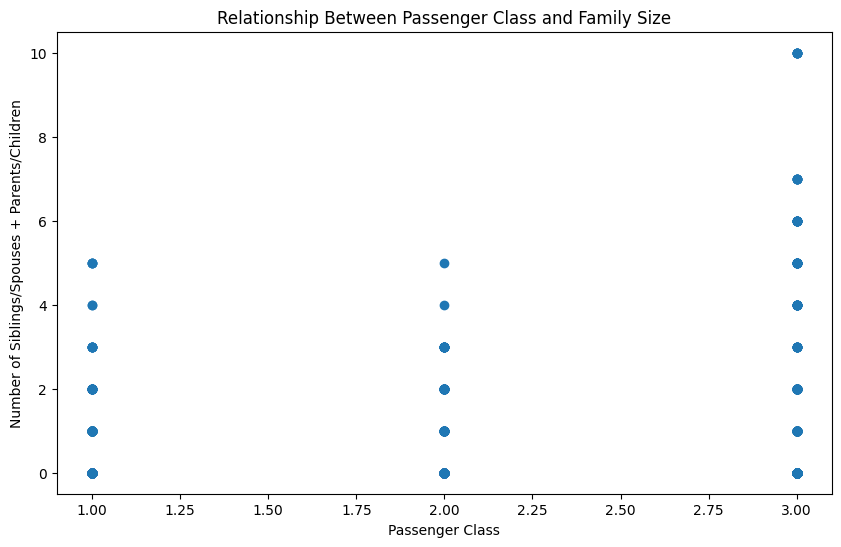

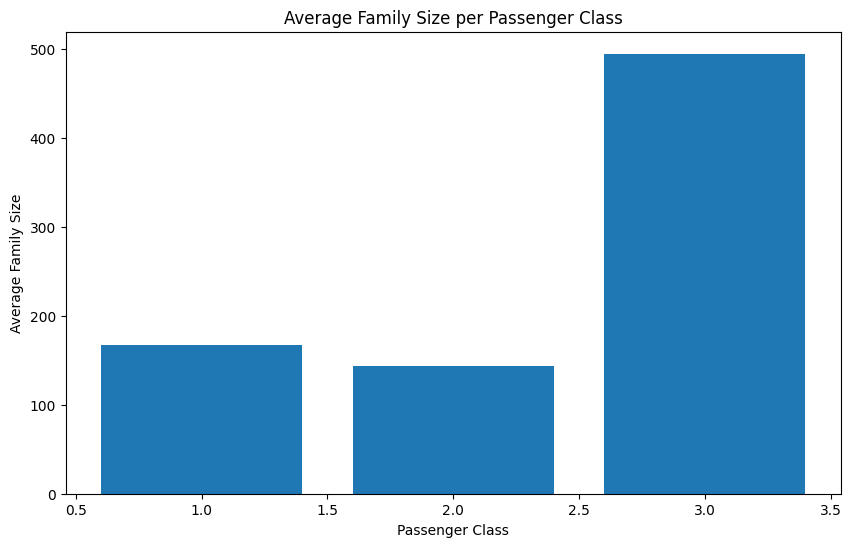

In [ ]:
import matplotlib.pyplot as plt
# สร้างกราฟแสดงความสัมพันธ์ระหว่างชนชั้นและจำนวนพี่น้อง/พ่อแม่/ลูก
plt.figure(figsize=(10, 6))
plt.scatter(titanic_df['Pclass'], titanic_df['SibSp'] + titanic_df['Parch'])
plt.xlabel('Passenger Class')
plt.ylabel('Number of Siblings/Spouses + Parents/Children')
plt.title('Relationship Between Passenger Class and Family Size')
plt.show()

# สร้างกราฟแสดงจำนวนพี่น้อง/พ่อแม่/ลูกเฉลี่ยต่อชนชั้น
# Changed from tuple to list for column selection
average_family_size_by_class = titanic_df.groupby('Pclass')[['SibSp', 'Parch']].sum().sum(axis=1)
plt.figure(figsize=(10, 6))
plt.bar(average_family_size_by_class.index, average_family_size_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Average Family Size')
plt.title('Average Family Size per Passenger Class')
plt.show()

In [ ]:
# prompt: สร้างกราฟหาความสัมพันธ์ระหว่างชนชั้นของผู้โดยสารและจำนวนพี่น้องพ่อแม่ลูก

import plotly.express as px

# Group data by Pclass and SibSp/Parch
relationship_df = titanic_df.groupby(['Pclass', 'SibSp', 'Parch'])['PassengerId'].count().reset_index()
relationship_df = relationship_df.rename(columns={'PassengerId': 'PassengerCount'})

# Create a scatter plot
fig = px.scatter(relationship_df, x='Pclass', y='PassengerCount',
                 color='SibSp', size='Parch',
                 hover_data=['SibSp', 'Parch'],
                 title='Relationship Between Passenger Class and Number of Siblings/Parents/Children')

fig.show()



# 3. แสดงความสัมพันธ์ระหว่างชนชั้นของผู้โดยสารกับราคาตั๋ว

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



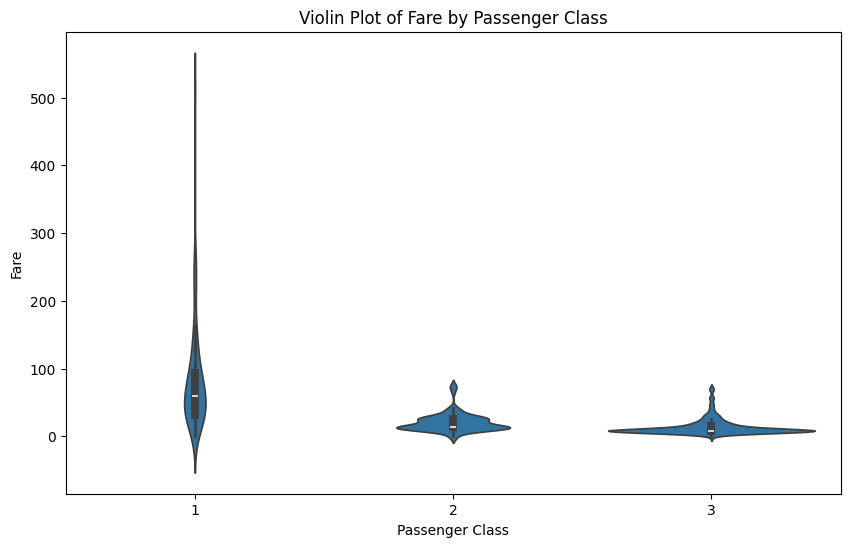

In [ ]:
# prompt: สร้าง violin chart จาก ราคาตั๋ว

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Fare', data=titanic_df)
plt.title('Violin Plot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


# 4. หาความสัมพันธ์ระหว่างชนชั้นทางสังคม (Pclass) กับห้องพักอาศัยแบบส่วนตัว (Cabin) ว่าชนชั้นใดมักจะมีที่พักอาศัยแบบส่วนตัว

In [ ]:
# prompt: คัดเอาเฉพาะ column Pclass และ Cabin จากนั้น สร้าง column ที่มีข้อมูลของ deck จาก cabin แยกออกมา เป็นตัวอักษรเฉยๆ

import pandas as pd
cabin_pclass_df = titanic_df[['Pclass', 'Cabin']].copy()

# สร้างฟังก์ชันสำหรับแยก deck จาก Cabin
def get_deck(cabin):
  if pd.isnull(cabin):
    return None
  else:
    return cabin[0]

# สร้าง column ใหม่ "Deck"
cabin_pclass_df['Deck'] = cabin_pclass_df['Cabin'].apply(get_deck)

cabin_pclass_df


,Pclass,Cabin,Deck
0,3,NaN,None
1,1,C85,C
2,3,NaN,None
3,1,C123,C
4,3,NaN,None
...,...,...,...
886,2,NaN,None
887,1,B42,B
888,3,NaN,None
889,1,C148,C


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

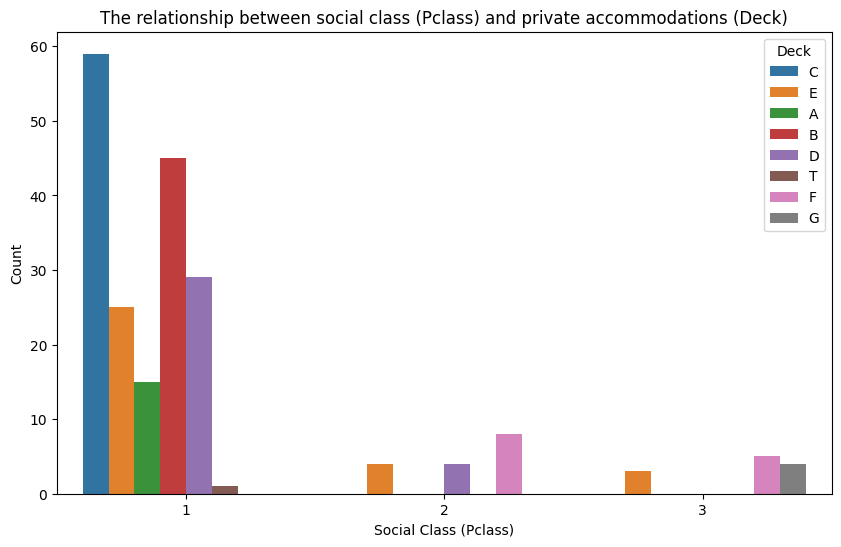

In [ ]:
# prompt: สร้างกราฟ groub bar chart The relationship between social class (Pclass) and private accommodations (Deck).

import matplotlib.pyplot as plt
import seaborn as sns

# Grouped bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Deck', data=cabin_pclass_df)
plt.title('The relationship between social class (Pclass) and private accommodations (Deck)')
plt.xlabel('Social Class (Pclass)')
plt.ylabel('Count')
plt.show()


# 5. กราฟวงกลม

In [ ]:
# prompt: หาว่าผู้หญิงมีกี่คน และผู้ชายมีกี่คน

# นับจำนวนผู้หญิงและผู้ชาย
sex_counts = titanic_df['Sex'].value_counts()

# แสดงผลลัพธ์
print(sex_counts)

# prompt: หาว่าเพศหญิง และเพสชายรอดชีวิตกี่คน

# หาจำนวนผู้หญิงที่รอดชีวิต
female_survived = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Survived'] == 1)]['Survived'].count()

# หาจำนวนผู้ชายที่รอดชีวิต
male_survived = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Survived'] == 1)]['Survived'].count()

print(f"จำนวนผู้หญิงที่รอดชีวิต: {female_survived} คน")
print(f"จำนวนผู้ชายที่รอดชีวิต: {male_survived} คน")


Sex
male      577
female    312
Name: count, dtype: int64
จำนวนผู้หญิงที่รอดชีวิต: 231 คน
จำนวนผู้ชายที่รอดชีวิต: 109 คน


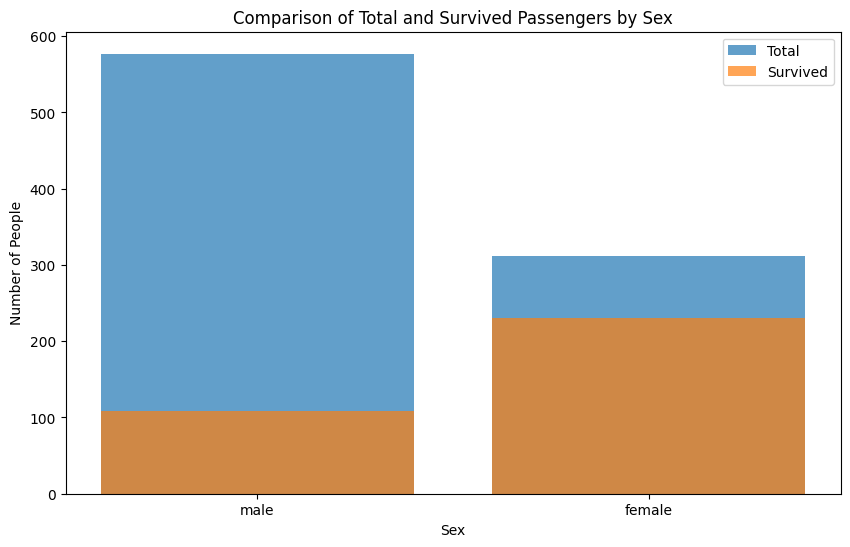

In [ ]:
# prompt: กราฟเปรียบเทียบจำนวนผู้หญิงและผู้ชายทั้งหมด กับจำนวนผู้หญิงกับผู้ชายที่รอดชีวิต

import matplotlib.pyplot as plt

# นับจำนวนผู้หญิงและผู้ชายทั้งหมด
sex_counts = titanic_df['Sex'].value_counts()

# นับจำนวนผู้หญิงและผู้ชายที่รอดชีวิต
survived_sex_counts = titanic_df[titanic_df['Survived'] == 1]['Sex'].value_counts()

# สร้างกราฟแท่งเปรียบเทียบ
fig, ax = plt.subplots(figsize=(10, 6))

# กราฟแท่งแสดงจำนวนผู้หญิงและผู้ชายทั้งหมด
ax.bar(sex_counts.index, sex_counts.values, label='Total', alpha=0.7)

# กราฟแท่งแสดงจำนวนผู้หญิงและผู้ชายที่รอดชีวิต
ax.bar(survived_sex_counts.index, survived_sex_counts.values, label='Survived', alpha=0.7)


ax.set_xlabel('Sex')
ax.set_ylabel('Number of People')
ax.set_title('Comparison of Total and Survived Passengers by Sex')
ax.legend()

plt.show()


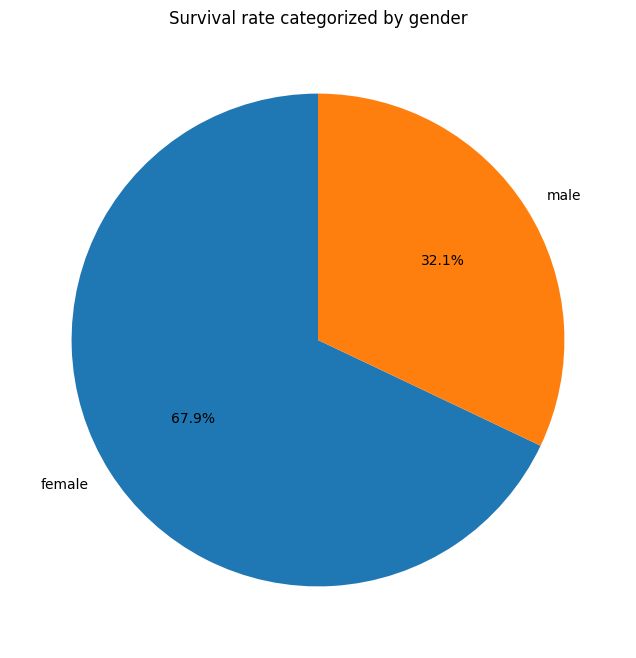

In [ ]:
# prompt: กราฟวงกลม (Pie Chart) ใช้แสดงสัดส่วนของการรอดชีวิตระหว่างเพศชายและเพศหญิง โดยแบ่งวงกลมออกเป็นส่วนๆ ตามอัตราการรอดชีวิตของแต่ละเพศ เหมาะสำหรับการแสดงสัดส่วนแบบรวม

# สร้างตารางแสดงจำนวนผู้รอดชีวิตตามเพศ
survival_by_sex = titanic_df.groupby('Sex')['Survived'].sum()

# สร้างกราฟวงกลม
plt.figure(figsize=(8, 8))
plt.pie(survival_by_sex, labels=survival_by_sex.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival rate categorized by gender')
plt.show()

# 6. กราฟความหนาแน่น

<ipython-input-21-1e0e4bb03224>:8: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-21-1e0e4bb03224>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




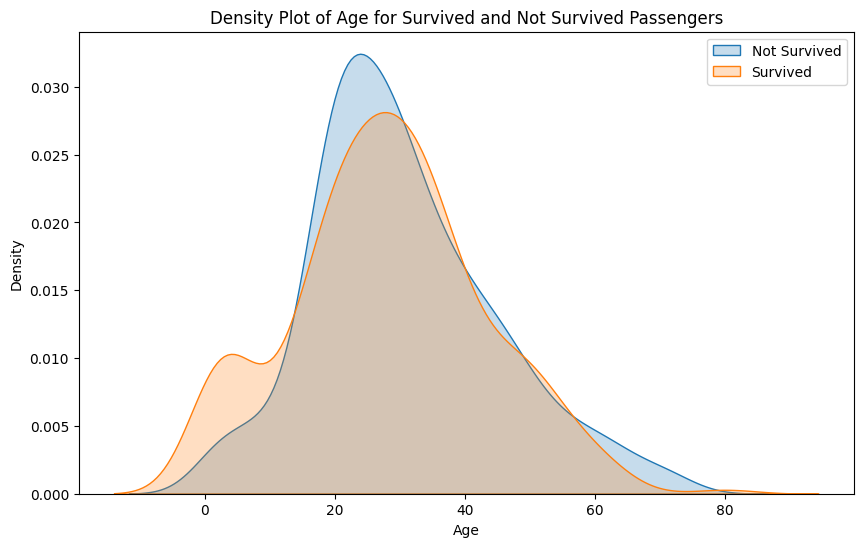

In [ ]:
# prompt: กราฟความหนาแน่น (Density Plot) ของอายุผู้โดยสาร แสดงความหนาแน่นของการกระจายตัวของอายุในกลุ่มผู้โดยสารที่รอดชีวิตและไม่รอดชีวิต

import matplotlib.pyplot as plt
import seaborn as sns

# สร้างกราฟความหนาแน่นของอายุ แยกตามการรอดชีวิต
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic_df[titanic_df['Survived'] == 0]['Age'], label='Not Survived', shade=True)
sns.kdeplot(titanic_df[titanic_df['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Density Plot of Age for Survived and Not Survived Passengers')
plt.legend()
plt.show()


# 7. Heatmap

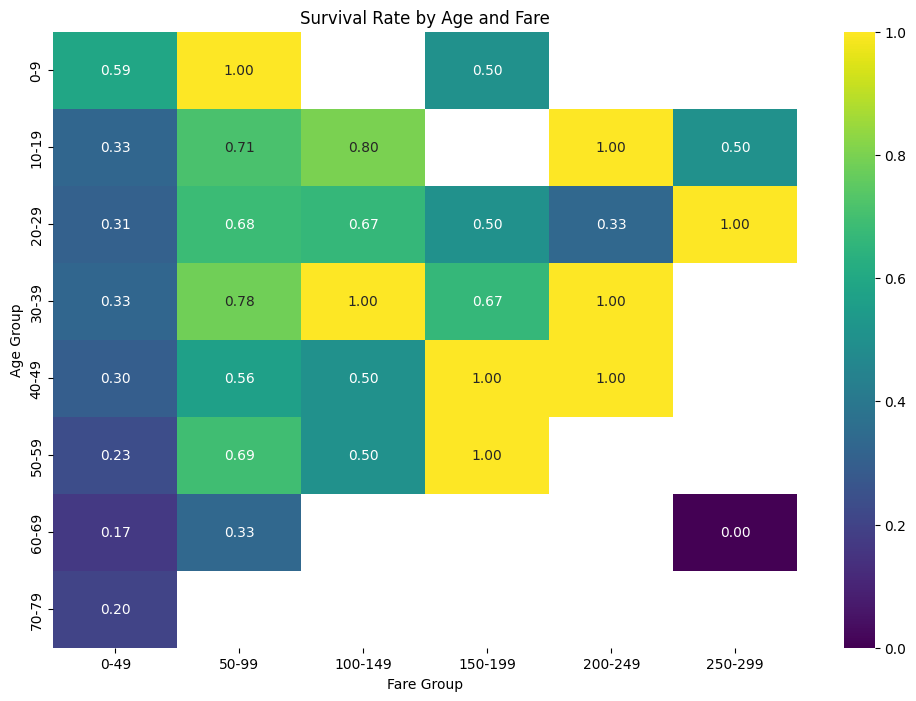

In [ ]:
# prompt: การวิเคราะห์การรอดชีวิตตามอายุและค่าโดยสาร (Survival Rate by Age and Fare) สร้าง Heat map ที่แสดงความสัมพันธ์ระหว่างอายุของผู้โดยสารและค่าโดยสารที่จ่ายกับอัตราการรอดชีวิต ซึ่งจะช่วยให้เห็นว่าช่วงอายุและค่าโดยสารใดที่มีผลต่อการรอดชีวิตมากที่สุด

import pandas as pd
import matplotlib.pyplot as plt
# สร้างตารางใหม่โดยรวมอายุและค่าโดยสารเข้าด้วยกัน
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=range(0, 81, 10), labels=[f'{i}-{i+9}' for i in range(0, 80, 10)])
titanic_df['Fare_Group'] = pd.cut(titanic_df['Fare'], bins=range(0, 550, 50), labels=[f'{i}-{i+49}' for i in range(0, 500, 50)])

# สร้างตารางแบบไขว้ (crosstab) เพื่อหาอัตราการรอดชีวิตในแต่ละกลุ่มอายุและค่าโดยสาร
survival_rate_by_age_fare = pd.crosstab(titanic_df['Age_Group'], titanic_df['Fare_Group'], values=titanic_df['Survived'], aggfunc='mean')

# สร้าง heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(survival_rate_by_age_fare, annot=True, cmap='viridis', fmt=".2f")
plt.title('Survival Rate by Age and Fare')
plt.xlabel('Fare Group')
plt.ylabel('Age Group')
plt.show()


# 8. หาความสัมพันธ์ระหว่างเมืองต้นทางและจำนวนพี่น้องและจำนวนลูก

In [ ]:
# prompt: สร้างตารางเฉพาะผู้โดยสารที่มีพี่น้อง

# สร้างตารางเฉพาะผู้โดยสารที่มีพี่น้อง
passengers_with_siblings = titanic_df[titanic_df['SibSp'] > 0]

# แสดงตาราง
passengers_with_siblings


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Age_Group,Fare_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,20-29,0-49
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,30-39,50-99
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39,30-39,50-99
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0-9,0-9,0-49
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,10-19,10-19,0-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,20-29,20-29,0-49
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S,0-9,0-9,0-49
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,40-49,40-49,50-99
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C,20-29,20-29,0-49


In [ ]:
# prompt: สร้างตารางระบุว่าจากเมืองทั้งสามเมืองผู้โดยสารมีพี่น้องเท่าไหร่บ้าง และมีผู้โดยสารเหล่านั้นกี่คน

# สร้างตารางแสดงจำนวนพี่น้องและจำนวนผู้โดยสารในแต่ละเมือง
sibling_counts_by_embarked = titanic_df.groupby(['Embarked', 'SibSp'])['PassengerId'].count().unstack().fillna(0)

# แสดงตาราง
sibling_counts_by_embarked


SibSp,0,1,2,3,4,5,8
Embarked,,,,,,,
C,109.0,53.0,6.0,0.0,0.0,0.0,0.0
Q,59.0,11.0,3.0,0.0,4.0,0.0,0.0
S,438.0,145.0,19.0,16.0,14.0,5.0,7.0


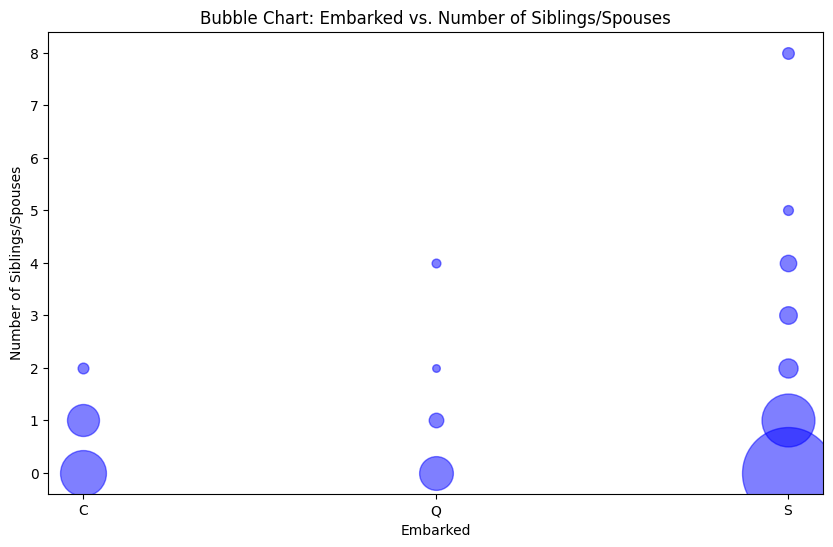

In [ ]:
# prompt: เปลี่ยนสีกราฟ 'Bubble Chart: Embarked vs. Number of Siblings/Spouses' เป็นสีเดียวกัน

import matplotlib.pyplot as plt
# สร้าง bubble chart
plt.figure(figsize=(10, 6))

for embarked in sibling_counts_by_embarked.index:
  for sibsp in sibling_counts_by_embarked.columns:
    plt.scatter(embarked, sibsp, s=sibling_counts_by_embarked.loc[embarked, sibsp] * 10, alpha=0.5, color='blue') # เปลี่ยนสีเป็น 'blue'

plt.xlabel('Embarked')
plt.ylabel('Number of Siblings/Spouses')
plt.title('Bubble Chart: Embarked vs. Number of Siblings/Spouses')
plt.show()


In [ ]:
# prompt: สร้างตารางระบุว่าจากเมืองทั้งสามเมืองผู้โดยสารมีพี่น้องเท่าไหร่บ้าง และมีผู้โดยสารเหล่านั้นกี่คน

# สร้างตารางแสดงจำนวนพี่น้องและจำนวนผู้โดยสารในแต่ละเมือง
Parch_counts_by_embarked = titanic_df.groupby(['Embarked', 'Parch'])['PassengerId'].count().unstack().fillna(0)

# แสดงตาราง
Parch_counts_by_embarked


Parch,0,1,2,3,4,5,6
Embarked,,,,,,,
C,123.0,30.0,14.0,1.0,0.0,0.0,0.0
Q,69.0,6.0,1.0,0.0,0.0,1.0,0.0
S,484.0,82.0,65.0,4.0,4.0,4.0,1.0


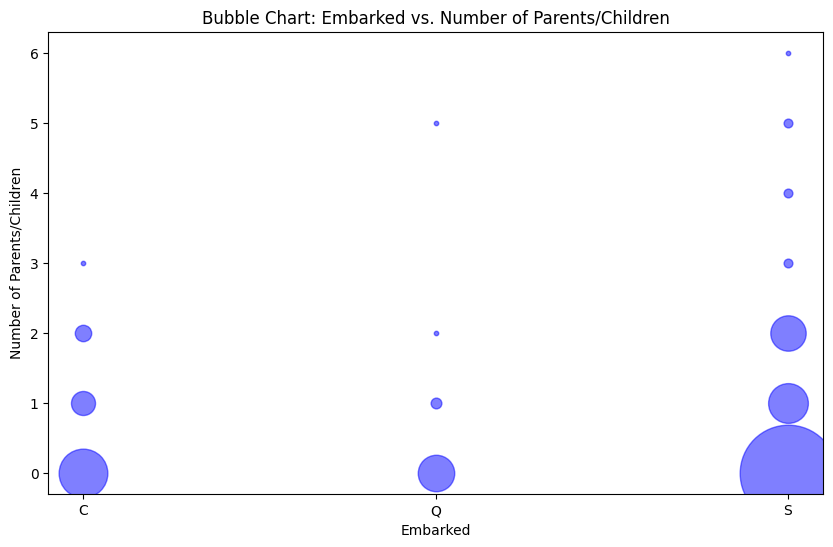

In [ ]:
# prompt: สร้าง bubble chart จาก Parch_counts_by_embarked

import matplotlib.pyplot as plt
# สร้าง bubble chart
plt.figure(figsize=(10, 6))

for embarked in Parch_counts_by_embarked.index:
  for parch in Parch_counts_by_embarked.columns:
    plt.scatter(embarked, parch, s=Parch_counts_by_embarked.loc[embarked, parch] * 10, alpha=0.5, color='blue') # เปลี่ยนสีเป็น 'blue'

plt.xlabel('Embarked')
plt.ylabel('Number of Parents/Children')
plt.title('Bubble Chart: Embarked vs. Number of Parents/Children')
plt.show()


In [ ]:
# prompt: สร้างกราฟ scatter 3D หาความสัมพันธ์ระหว่างเมืองต้นทางและจำนวนพี่น้องและจำนวนลูก

import plotly.express as px

fig = px.scatter_3d(titanic_df, x='Embarked', y='SibSp', z='Parch',
              hover_data=['Name'])

fig.update_layout(title='Scatter Plot of Embarked, SibSp, and Parch',
                  scene = dict(
                      xaxis_title='Embarked',
                      yaxis_title='SibSp',
                      zaxis_title='Parch'
                  ))

fig.show()


# 9. กราฟโดนัท

In [ ]:
# prompt: แยกตาราง column Survived เอาเฉพาะผู้รอดชีวิต
survived_df = titanic_df[titanic_df['Survived'] == 1]

# prompt: แยกเอาแค่ชื่อแรกของ column Name
survived_df['FirstName'] = survived_df['Name'].str.split(',').str[0]

# prompt: แยกเอาแค่ตัวอักษรแรกของ FirstName
survived_df['FirstLetter'] = survived_df['FirstName'].str[0]

# prompt: สร้างตารางจัดกลุ่ม FirstLetter ที่ตัวเดียวกันอยุ่ด้วยกัน
grouped_df = survived_df.groupby('FirstLetter').agg({'FirstName': 'count'})
grouped_df

<ipython-input-37-4f5b588da52d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-37-4f5b588da52d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,FirstName
FirstLetter,
A,19
B,35
C,27
D,20
E,3
F,12
G,10
H,32
I,1


In [ ]:
# prompt: เปลี่ยน d ใน grouped_df เป็น D แล้วนับรวมกับ D ในตารางเดิม
# Copy the DataFrame to avoid modifying the original
new_grouped_df = grouped_df.copy()

# Replace 'd' with 'D' in the index
new_grouped_df.rename(index={'d': 'D'}, inplace=True)

# Group by 'FirstLetter' again and sum the 'FirstName' column
new_grouped_df = new_grouped_df.groupby('FirstLetter')['FirstName'].sum()

new_grouped_df

,FirstName
FirstLetter,
A,19
B,35
C,27
D,22
E,3
F,12
G,10
H,32
I,1


In [ ]:
import plotly.express as px
plt.figure(figsize=(12, 8))
fig = px.pie(new_grouped_df, values='FirstName', names=new_grouped_df.index, hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Survival Rate by First Letter of Name')
fig.show()

<Figure size 1200x800 with 0 Axes>

## แถมๆๆ

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
# prompt: แยกเอาแค่ตัวอักษรแรกของ FirstName จาก titanic_df แล้วสร้างเป็นตาราง titanic_df1 ใหม่
titanic_df1 = titanic_df.copy()
titanic_df1['FirstLetter'] = titanic_df1['Name'].str.split(',').str[0].str[0]
titanic_df1 = titanic_df1[['FirstLetter']]

# Group by 'FirstLetter1' and aggregate the 'Name' column (e.g., by counting)
grouped_df1 = titanic_df1.groupby('FirstLetter')['FirstLetter'].count()
grouped_df1

,FirstLetter
FirstLetter,
A,51
B,72
C,69
D,39
E,12
F,31
G,41
H,69
I,5


In [ ]:
# Copy the DataFrame to avoid modifying the original
grouped_df2 = grouped_df1.copy()

# Replace 'd' with 'D' in the index
grouped_df2.rename(index={'d': 'D','v':'V'}, inplace=True) # Changed from list of dictionaries to a single dictionary

# Group by 'FirstLetter' again and sum the 'FirstName' column
grouped_df2 = grouped_df2.groupby('FirstLetter').sum() #Removed the column name as it is not required

# prompt: สร้างตารางโดยรวมข้อมูลจาก new_grouped_df กับ grouped_df2 เข้าไว้ด้วยกัน
import pandas as pd
# Merge the two DataFrames based on the index (FirstLetter)
merged_df = pd.merge(new_grouped_df, grouped_df2, left_index=True, right_index=True, how='outer')

# Rename the columns for clarity
merged_df = merged_df.rename(columns={'FirstName': 'SurvivedCount', 'FirstLetter': 'TotalCount'})

# Fill NaN values with 0 (if any)
merged_df = merged_df.fillna(0)

# Display the merged DataFrame
merged_df

,SurvivedCount,TotalCount
FirstLetter,,
A,19.0,51
B,35.0,72
C,27.0,69
D,22.0,43
E,3.0,12
F,12.0,31
G,10.0,41
H,32.0,69
I,1.0,5


In [ ]:
# prompt: ทำให้ตาราง merged_df column 	SurvivedCount ไม่มีเลขทศนิยม

merged_df['SurvivedCount'] = merged_df['SurvivedCount'].astype(int)
merged_df

,SurvivedCount,TotalCount
FirstLetter,,
A,19,51
B,35,72
C,27,69
D,22,43
E,3,12
F,12,31
G,10,41
H,32,69
I,1,5


In [ ]:
# prompt: สร้างกราฟเปรียบเทียบโดยคิดเป็นเปอร์เซ็นของ SurvivedCount	 เปรียบเทียบกับ TotalCount ของแต่ละตัวอักษร

merged_df['SurvivalPercentage'] = (merged_df['SurvivedCount'] / merged_df['TotalCount']) * 100

# Create a bar chart comparing SurvivalPercentage and TotalCount
fig = px.bar(merged_df, x=merged_df.index, y='SurvivalPercentage',
             color='TotalCount', title='Survival Percentage by First Letter of Name',
             labels={'SurvivalPercentage': 'Survival Percentage', 'TotalCount': 'Total Count'})
fig.show()


In [ ]:
# prompt: สร้างกราฟแท่งและเส้นแนวโน้มเปรียบเทียบ SurvivedCount กับ TotalCount ของแต่ละตัวอักษร โดยไล่ระดัสีตามอัตราการรอดชีวิต

import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add a bar chart for SurvivedCount
fig.add_trace(go.Bar(
    x=merged_df.index,
    y=merged_df['SurvivedCount'],
    name='Survived Count',
    marker_color=merged_df['SurvivalPercentage'],  # Color bars by SurvivalPercentage
))

# Add a line chart for TotalCount
fig.add_trace(go.Scatter(
    x=merged_df.index,
    y=merged_df['TotalCount'],
    mode='lines+markers',
    name='Total Count',
    line=dict(color='red')
))

# Customize the layout
fig.update_layout(
    title='Survived Count vs. Total Count by First Letter of Name',
    xaxis_title='First Letter',
    yaxis_title='Count',
    barmode='group',  # Group the bars
    coloraxis_colorbar_title='Survival Percentage'
)

# Update the color scale
fig.update_coloraxes(colorscale='Viridis')  # You can change the colorscale here

# Show the plot
fig.show()